## Отбор признаков

## Практика. Отбор признаков.
<p id="9">Рассмотрим методы отбора признаков на практике.</p>

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

Подгружаем датасет.

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)

### Корреляция

Самое первое и очевидное, что можно сделать для отбора признаков - это посмотреть на матрицу корреляций. Строим ее. Здесь достаточно хорошо видно, какие признаки хорошо коррелируют между собой и было бы неплохо их выкинуть.

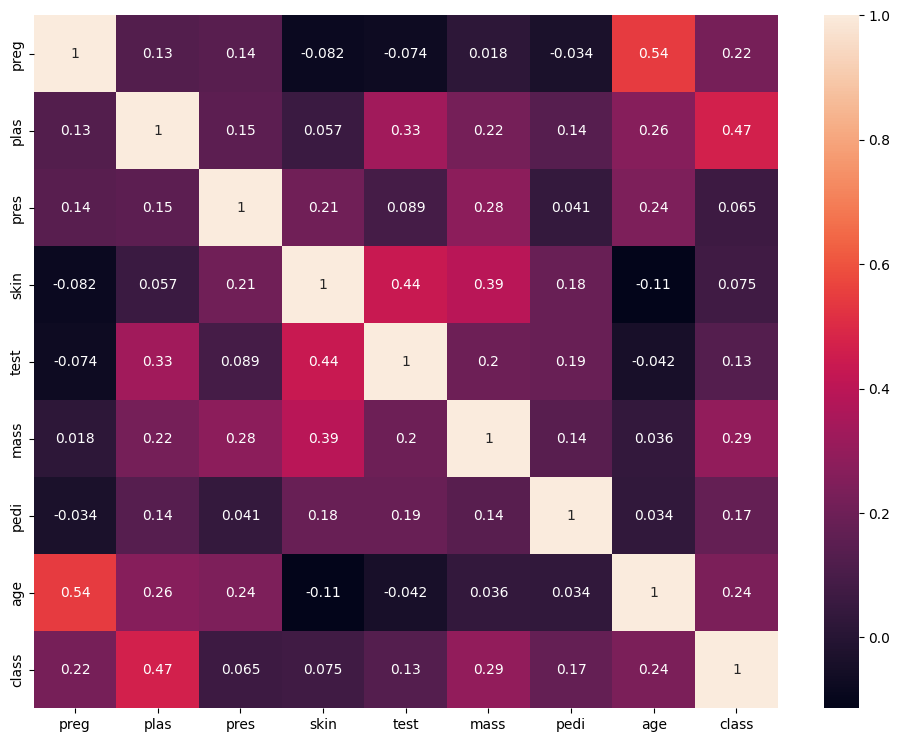

In [ ]:
corr = dataframe.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()

### Взаимная информация

In [ ]:
from sklearn.metrics import mutual_info_score

for col in names[:-1]:
    print('class -', col, mutual_info_score(dataframe[col], dataframe['class']))

class - preg 0.04285406127277179
class - plas 0.21085615360952042
class - pres 0.04111026790882456
class - skin 0.05660541023678324
class - test 0.19206729136136813
class - mass 0.2383113668395052
class - pedi 0.45118180206849473
class - age 0.09769272275595872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Далее построим модель на основе деревьев решений, и посмотрим важность признаков, которую она нам вернет. В итоге, снова получаем самый высокий коэффициент важности у одного признака ("plas"), которой мы видели и в матрице корреляций с таргетной переменной с наибольшей корреляцией.

### Подходы встроенные в модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = dataframe.iloc[:,:8]
Y = dataframe.iloc[:,8]
# извлечение признаков
model = RandomForestClassifier(random_state=1)
model.fit(X, Y) # обучение

RandomForestClassifier(random_state=1)

In [ ]:
model.feature_importances_

array([0.08486357, 0.24850551, 0.08661207, 0.06846139, 0.07643332,
       0.17119198, 0.12469328, 0.13923887])

In [ ]:
imps = pd.Series(model.feature_importances_, index=names[:-1])
imps.sort_values()

skin    0.068461
test    0.076433
preg    0.084864
pres    0.086612
pedi    0.124693
age     0.139239
mass    0.171192
plas    0.248506
dtype: float64

Посмотрим важность признаков с точки зрения линейных методов

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
X_sc = StandardScaler().fit_transform(X) # преобразование данных

m_l = LogisticRegression().fit(X_sc, Y)

In [ ]:
pd.Series(m_l.coef_[0], index=names[:-1]).sort_values()

pres   -0.250868
test   -0.130836
skin    0.009050
age     0.176498
pedi    0.308837
preg    0.408647
mass    0.696309
plas    1.107112
dtype: float64

### Перемешивающий подход

In [ ]:
# 1 признак
# 2 признак - перемешать


# 1 признак - [1, 2, 3, 2]
# [2, 1, 2, 3]


# acc = 0.8
# acc = 0.5

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model, X, Y)
res

{'importances_mean': array([0.04140625, 0.19192708, 0.02942708, 0.02473958, 0.03645833,
        0.10234375, 0.06432292, 0.08411458]),
 'importances_std': array([0.00323169, 0.00933876, 0.00268115, 0.00419909, 0.00540011,
        0.00335523, 0.00842238, 0.00382733]),
 'importances': array([[0.0390625 , 0.03776042, 0.046875  , 0.04296875, 0.04036458],
        [0.18880208, 0.17838542, 0.20182292, 0.203125  , 0.1875    ],
        [0.03125   , 0.02473958, 0.02864583, 0.03255208, 0.02994792],
        [0.02864583, 0.0234375 , 0.0234375 , 0.02994792, 0.01822917],
        [0.03255208, 0.03255208, 0.04166667, 0.04427083, 0.03125   ],
        [0.10026042, 0.10546875, 0.10677083, 0.1015625 , 0.09765625],
        [0.05338542, 0.06640625, 0.07552083, 0.05598958, 0.0703125 ],
        [0.08984375, 0.08723958, 0.08203125, 0.08203125, 0.07942708]])}

In [ ]:
imps = pd.Series(res['importances_mean'], index=names[:-1])
imps.sort_values()

skin    0.024740
pres    0.029427
test    0.036458
preg    0.041406
pedi    0.064323
age     0.084115
mass    0.102344
plas    0.191927
dtype: float64

### Отборы признаков в sklearn

https://scikit-learn.org/stable/modules/feature_selection.html

### 🧠 Упражнение: провести отбор признаков

1. Коэффициент корреляции
2. Взаимная информация
3. Модели
4. Перемешивающий подход

In [ ]:
from sklearn import datasets

X, y = datasets.load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 🧠 Упражнение: провести отбор признаков (ответ)


In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



1. Коэффициент корреляции

In [ ]:
corr = df.corr()
corr['target'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
target                          1.000000
Name: target, dtype: float64

2. Взаимная информация

In [ ]:
from sklearn.metrics import mutual_info_score

res = pd.Series()
for col in df.columns[:-1]:
    res = pd.concat([res, pd.Series(mutual_info_score(df[col], df['target']), index=[col])])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/loc

In [ ]:
res.sort_values()

nonflavanoid_phenols            0.328487
magnesium                       0.440947
alcalinity_of_ash               0.510013
ash                             0.545049
hue                             0.721841
proanthocyanins                 0.773655
total_phenols                   0.818791
malic_acid                      0.890141
proline                         0.902163
alcohol                         0.929244
od280/od315_of_diluted_wines    0.933704
color_intensity                 0.949669
flavanoids                      0.984792
dtype: float64

3. Модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X, y)

RandomForestClassifier(random_state=1)

In [ ]:
imps = pd.Series(model.feature_importances_, index=X.columns)
imps.sort_values()

nonflavanoid_phenols            0.010068
ash                             0.012625
malic_acid                      0.019838
proanthocyanins                 0.021885
alcalinity_of_ash               0.022348
magnesium                       0.032354
total_phenols                   0.041013
hue                             0.082613
od280/od315_of_diluted_wines    0.129824
color_intensity                 0.135429
alcohol                         0.146294
flavanoids                      0.164055
proline                         0.181655
dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler().fit_transform(X)
m_l = LogisticRegression().fit(X_sc, y)

In [ ]:
pd.Series(m_l.coef_[0], index=X.columns).sort_values()

alcalinity_of_ash              -0.844784
nonflavanoid_phenols           -0.199825
magnesium                       0.049529
hue                             0.130909
proanthocyanins                 0.138339
color_intensity                 0.171610
malic_acid                      0.203821
total_phenols                   0.213725
ash                             0.472212
flavanoids                      0.647875
od280/od315_of_diluted_wines    0.725951
alcohol                         0.810135
proline                         1.078959
dtype: float64

4. Перемешивающий подход

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model, X, y)
imps = pd.Series(res['importances_mean'], index=X.columns)
imps.sort_values()

malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
nonflavanoid_phenols            0.000000
proanthocyanins                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
flavanoids                      0.001124
alcohol                         0.006742
color_intensity                 0.006742
proline                         0.041573
dtype: float64